<a href="https://colab.research.google.com/github/ttornike1991/Convolution-Demo/blob/main/Convolution_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolution
**Convolving** an image with a kernel of size  `k x k x c` means we are taking a piece of the image of size `k x k x c` and multiplying it element-wise by the kernel <br>
If `k = 3`, then convolving our image with the kernel of all ones can be visualized as shown below <br> <br>
<img src="https://i.stack.imgur.com/BCEoS.png" alt="drawing" width="400px"/> <br>
**Choosing right kernel** <br>
The most basic blurring kernel is the all ones kernel, it just averages out every pixel, but you can experiment with others <br>
Here is an implementation of a blurring convolution operator


#### Convolution Operator

In [ ]:
import numpy as np
"""
We convolve an image of size m x n with a kernel of size k x k with stride 

Inputs
  :img: <np.ndarray> of size n x m
  :kernel: <np.ndarray> of size k x k
  :stride: <int> indicates which pixels to convolve, default is 1

Outputs
  :returns: <np.ndarray> of size n x m representing the convolved image
"""
def convolve(img, kernel, stride = 1):
    h, w, c = img.shape
    k = kernel.shape[0]
    new_img = []

    for i in range(0, h, stride):
        row = []
        for j in range(0, w, stride):
            neighborhood = _get_neighbors(img, (i, j), k, c)
            average = _kernel_dot(neighborhood, kernel)
            row.append(average)
        new_img.append(row)

    return np.array(new_img)

### Helper functions ###
"""
We find all the neighbors of the pixel located at loc = (x, y) 
within a 1 pixel radius 

Inputs
    :img: <np.ndarray> of size (h, w, c) representing the image
    :loc: <tuple<int>> = (x, y) indicating pixel location
    :k: <int> size of kernel, must be ODD
    :c: <int> number of channels (1 for black and white, 3 for rgb images)

Outputs
    :returns: <np.ndarray> of size (k, k, c) representing the neighborhood of a pixel, if a pixel is on a boundary, we will assume missing pixels are 0
"""
def _get_neighbors(img, loc, k, c):
    raise NotImplementedError

"""
Computes the average of a neighborhood using given kernel
Ex: 
    If kernel is [[1 1 1]
                  [1 1 1]
                  [1 1 1]]
    Then image will become
        [[1 1 1]       
          [1 0 1]   ->   [[8]]
          [1 1 1]]       
"""
def _kernel_dot(neighborhood, kernel):
    raise NotImplementedError

#### Helper Functions

In [ ]:
import os
import cv2
import requests
%matplotlib inline
import matplotlib.image as mpimg
from urllib.parse import urlparse
from matplotlib import pyplot as plt

"""
Downloads the content of a url to the specified home_dir

Inputs
    :url: <str> to the location contianing the content
    :home_dir: <str> the home directory containing subdirectories to write to
    :fn: the name to give the file when saved

Outputs
    :returns: the path to the saved file containing the content
"""
def download(url, home_dir, stream = False, fn = None):
    ext = _get_ext(url)

    if fn is None:
        fn = url.split('/')[-1]

    r = requests.get(url, stream=stream)
    if r.status_code == 200:
        with open(f"{home_dir}/{fn}{ext}", 'wb') as output_file:
            if stream:
                for chunk in r.iter_content(chunk_size=1024**2): 
                    if chunk: output_file.write(chunk)
            else:
                output_file.write(r.content)
                print("{} downloaded: {:.2f} KB".format(fn, len(r.content) / 1024.0))
            return f"{home_dir}/{fn}{ext}"
    else:
        raise ValueError(f"url not found: {url}")

""" Downloads and loads up an image as a np.ndarray """
def get_image(url, home_dir, image_name, image_path = None):
    if image_path is None: 
      image_path = download(url, home_dir, fn=image_name)
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    return np.array(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

""" Saves an image to the given path """
def save_image(image, image_path):
    cv2.imwrite(image_path, image)
    image = get_image(None, home_dir, image_name, image_path = image_path)
    cv2.imwrite(image_path, image)

""" Displays 2 images next to each other """
def display(before_image_path, after_image_path):
    f, plot = plt.subplots(1, 2)
    before_image = mpimg.imread(before_image_path)
    after_image = mpimg.imread(after_image_path)
    print(f"Before Size: {before_image.shape}")
    print(f"After Size: {after_image.shape}")
    plot[0].imshow(before_image)
    plot[1].imshow(after_image)
    plt.show()

### Helper Functions ###
_get_ext = lambda url: os.path.splitext(urlparse(url).path)[1]

### Convolution Demo

#### Global Constants

In [ ]:
shift = 200
home_dir = "/content"
image_name = "test_img"
image_url = input("Image url: ")
image_path = f"{home_dir}/{image_name}{_get_ext(image_url)}"
convolved_image_path = f"{home_dir}/convolved_{image_name}.png"
translated_image_path = f"{home_dir}/translated_{image_name}.png"

Image url: https://www.kitchensanctuary.com/wp-content/uploads/2014/06/miniburgers-270a5730-june2014_web.jpg


#### Kernels 
The most basic kernel is the all ones kernel, it just averages out every pixel, but you can experiment with others

In [ ]:
sharpen_kernel = np.array(
    [
     [[0], [-1], [0]],
     [[-1], [5], [-1]],
     [[0], [-1], [0]]
    ], dtype=np.int8
)

blur_kernel = 1/256 * np.array(
    [
     [[1], [4], [6], [4], [1]],
     [[4], [16], [24], [16], [4]],
     [[6], [24], [36], [24], [6]],
     [[4], [16], [24], [16], [4]],
     [[1], [4], [6], [4], [1]],
    ], dtype=np.float32
)

#### Create a kernel that isolates just the outline of the image! ####
edge_kernel = np.array()


#### Create and experiment with your own kernels! ####
my_kernel = np.array()

#### Convolution

test_img downloaded: 34.57 KB
Before Size: (800, 800, 3)
After Size: (800, 800, 3)


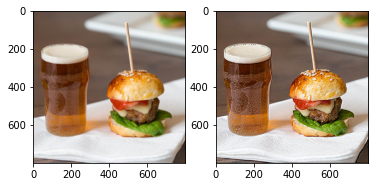

In [ ]:
image = get_image(image_url, home_dir, image_name)

convolved_image = convolve(image, sharpen_kernel)
save_image(convolved_image, convolved_image_path)
display(image_path, convolved_image_path)

### Translation Invariance Demo

Before Size: (584, 612, 3)
After Size: (584, 612, 3)


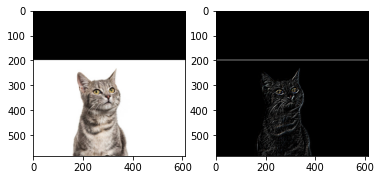

In [ ]:
# Translation => convolution
h, w, c = image.shape
translated_image = np.roll(image, shift, axis=0)
translated_image[:shift, ::] = np.ones((shift, w, c))
save_image(translated_image, translated_image_path)

convolved_image = convolve(translated_image, edge_kernel)
save_image(convolved_image, convolved_image_path)

display(translated_image_path, convolved_image_path)

Before Size: (584, 612, 3)
After Size: (584, 612, 3)


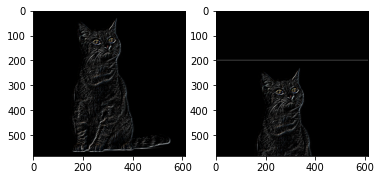

In [ ]:
# Convolution => translation
convolved_image = convolve(image, edge_kernel)
save_image(convolved_image, convolved_image_path)

h, w, c = convolved_image.shape
translated_image = np.roll(convolved_image, shift, axis=0)
translated_image[:shift, ::] = np.ones((shift, w, c))
save_image(translated_image, translated_image_path)

display(convolved_image_path, translated_image_path)